In [92]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [93]:
# -------------------------------------
# Part 1: Data Loading and Exploration
# -------------------------------------

In [94]:
# -------------------------------
# Part 1.1: Data Loading
# -------------------------------

df_header = pd.read_csv("STONYBRK_20240531_HEADER.csv")
df_line   = pd.read_csv("STONYBRK_20240531_LINE.csv")
df_code   = pd.read_csv("STONYBRK_20240531_CODE.csv")


In [95]:
# -------------------------------
# Part 1.2: Data Exploration
# -------------------------------

## Shape (number of rows and columns)
print("HEADER: SHAPE (ROWS, COLUMNS)")
print(df_header.shape)

print("LINE: SHAPE (ROWS, COLUMNS)")
print(df_line.shape)

print("CODE: SHAPE (ROWS, COLUMNS)")
print(df_code.shape)

## First 5 rows
print("\n HEADER: FIRST 5 ROWS")
print(df_header.head())

print("\n LINE: FIRST 5 ROWS")
print(df_line.head())

print("\n CODE: FIRST 5 ROWS")
print(df_code.head())

## Column names and data types
print("\n HEADER: COLUMN NAMES AND DATA TYPES")
print(df_header.dtypes)

print("\n LINE: COLUMN NAMES AND DATA TYPES")
print(df_line.dtypes)

print("\n CODE: COLUMN NAMES AND DATA TYPES")
print(df_code.dtypes)

## Missing value counts
print("\n HEADER: MISSING VALUES PER COLUMN")
print(df_header.isna().sum())

print("\n LINE: MISSING VALUES PER COLUMN")
print(df_line.isna().sum)

print("\n CODE: MISSING VALUES PER COLUMN")
print(df_code.isna().sum())

## Basic descriptive statistics for numeric columns
print("\n HEADER: BASIC DESCRIPTIVE STATS (NUMERIC COLUMNS)")
print(df_header.describe())

print("\n LINE: BASIC DESCRIPTIVE STATS (NUMERIC COLUMNS)")
print(df_line.describe())

print("\n CODE: BASIC DESCRIPTIVE STATS (NUMERIC COLUMNS)")
print(df_code.describe())

HEADER: SHAPE (ROWS, COLUMNS)
(388, 43)
LINE: SHAPE (ROWS, COLUMNS)
(520, 28)
CODE: SHAPE (ROWS, COLUMNS)
(1536, 9)

 HEADER: FIRST 5 ROWS
   ClientId  ProspectiveClaimId ClaimType  BillingProviderNPI  \
0        49            35216986         P          1154376309   
1        49            35235657         P          1154376309   
2        49            35249003         P          1154376309   
3        49            35249014         P          1154376309   
4        49            35249016         P          1154376309   

               BillingProvFirstName  BillingProvLastName  \
0  NEW YORK SPINE AND BRAIN SURGERY                  NaN   
1  NEW YORK SPINE AND BRAIN SURGERY                  NaN   
2  NEW YORK SPINE AND BRAIN SURGERY                  NaN   
3  NEW YORK SPINE AND BRAIN SURGERY                  NaN   
4  NEW YORK SPINE AND BRAIN SURGERY                  NaN   

   AttendingProviderNPI AttendingProvFirstName AttendingProvLastName  \
0                   NaN              

------------------------------------------
# Part 1.3: Data Observation Documentation
------------------------------------------

1. How many unique claims are in the dataset?
<ul>
  <p>
    There are a total of 388 unique claims in the dataset.
  </p>
</ul>

2. What is the date range of the claims?
<ul>
  <p>
    The date range of the claims ranges from September 25,2023 to May 29, 2024.
  </p>
</ul>

3. How many service lines are there on average per claim?
<ul>
  <p>
    There are a total of 520 service lines across the 388 claims, which on average is 1.34 service lines per claim. This suggests most claims have 1 service line.
  </p>
</ul>

4. How many diagnosis codes are there on average per claim?
<ul>
  <p>
    For the diagnosis codes there are a toal of 1,536 codes across the 388 claims. On average is 3.96 which means roughly 4 diagnosis codes per claim.
  </p>
</ul>


In [96]:
# -------------------------------------
# Part 2: Relational Data Analysis
# -------------------------------------

Top 5 billing providers by number of claims:
   BillingProviderNPI                  BillingProviderName  ClaimCount
5          1821035601                        SB INTERNISTS         152
0          1063468536               SB SURGICAL ASSOCIATES          81
2          1154376309     NEW YORK SPINE AND BRAIN SURGERY          69
4          1538114723  UNIV.ASSOC.IN OBSTETRICS&GYNECOLOGY          40
3          1437105905            SB PSYCHIATRIC ASSOCIATES          36


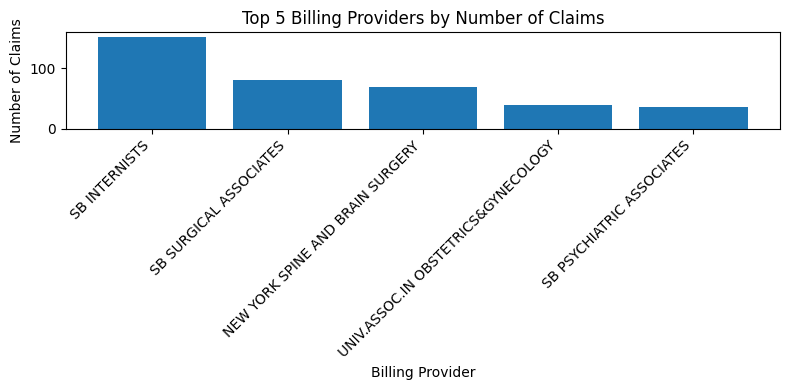

In [97]:
# -------------------------------
# Part 2.1: Provider Analysis
# -------------------------------

## Who are the top 5 billing providers by number of claims?

  ### Combine the providers first and last name by:
df_header["BillingProviderName"] = (
    df_header["BillingProvFirstName"].fillna("") + " " +
    df_header["BillingProvLastName"].fillna("")
).str.strip()

  ### Group by provider NPI & name, and count all the unique claims.
provider_group = df_header.groupby(
    ["BillingProviderNPI", "BillingProviderName"]
)["ProspectiveClaimId"].nunique().reset_index()
provider_group = provider_group.rename(columns={"ProspectiveClaimId": "ClaimCount"})

## Display: Provider name, NPI, and claim count.
top_5_providers = provider_group.sort_values(
    "ClaimCount", ascending=False
).head()

print("Top 5 billing providers by number of claims:")
print(top_5_providers)

## Create a simple bar chart showing the top 5 providers.
plt.figure(figsize=(8, 4))
plt.bar(top_5_providers["BillingProviderName"], top_5_providers["ClaimCount"])
plt.title("Top 5 Billing Providers by Number of Claims")
plt.xlabel("Billing Provider")
plt.ylabel("Number of Claims")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

Top 5 primary payers by claim volume:
             PrimaryPayerName  ClaimCount  ClaimPercent
0                    MEDICARE         242     62.371134
1             HEALTHFIRST FFS          46     11.855670
2  FIDELIS/BETTER HEALTH PLAN          26      6.701031
3                HIP MEDICAID          17      4.381443
4       HEALTHFIRST CAPITATED          10      2.577320


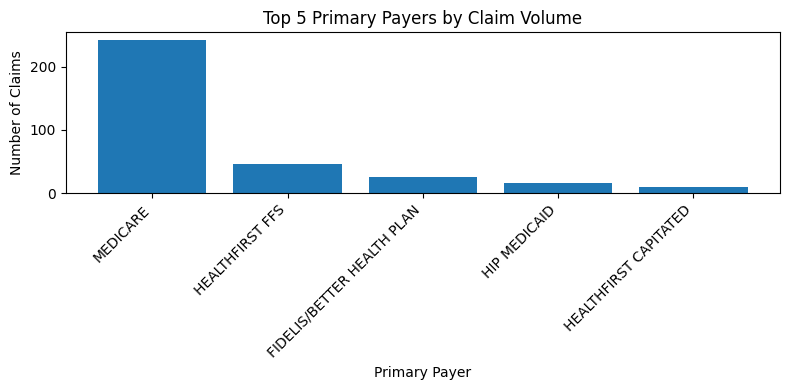

In [98]:
# -------------------------------
# Part 2.2: Payer Mix Analysis
# -------------------------------

## What are the top 5 primary payers by claim volume?

  ### Count of how many claims there are per primary payer.
payer_counts = df_header["PrimaryPayerName"].value_counts().reset_index()
payer_counts.columns = ["PrimaryPayerName", "ClaimCount"]

## Calculate the percentage of total claims for each payer.
  ### Number of claims (from HEADER table)
total_claims = payer_counts["ClaimCount"].sum()
  ### Percentage of total claims for each payer
payer_counts["ClaimPercent"] = (payer_counts["ClaimCount"] / total_claims) * 100

## Create a bar chart or pie chart showing payer distribution.
  ### Show top 5 payers
top5_payers = payer_counts.head(5)
print("Top 5 primary payers by claim volume:")
print(top5_payers)
# Bar chart of payer distribution
plt.figure(figsize=(8, 4))
plt.bar(top5_payers["PrimaryPayerName"], top5_payers["ClaimCount"])
plt.title("Top 5 Primary Payers by Claim Volume")
plt.xlabel("Primary Payer")
plt.ylabel("Number of Claims")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

In [99]:
# -------------------------------
# Part 2.3: Common Diagnoses
# -------------------------------

## What are the 10 most frequently appearing diagnosis codes (CodeValue)?
dc_counts = df_code["CodeValue"].value_counts().reset_index()
dc_counts.columns = ["CodeValue", "Frequency"]

## Display: ICD-10 code and frequency count
top10_dc = dc_counts.head(10)
print("Top 10 most frequently appearing diagnosis codes (CodeValue):")
print(top10_dc)

## Note: You may want to look up what these codes mean online (icd10data.com)


Top 10 most frequently appearing diagnosis codes (CodeValue):
  CodeValue  Frequency
0    J96.01         62
1       I10         49
2     E78.5         49
3     G93.5         34
4     D64.9         29
5    I25.10         27
6     I61.9         26
7    I48.91         24
8     I60.8         24
9     I50.9         22


Top 10 most frequently billed procedure codes (HCPCS):
     HCPCS                                ClientProcedureName  Frequency
104  99291                  CRITICAL CARE, INITIAL FIRST HOUR         68
89   99222   INITIAL HOSPITAL CARE PER DAY FOR THE E&M OF ...         30
96   99233  SUBSEQ. HOSP CARE DETAILED INTERVAL HX,EX,HIGH...         27
91   99223  INITIAL  HOSPITAL CARE PER DAY,FOR THE E&M OF ...         24
81   99213  OFFICE/OUTPATIENT VISIT,ESTABL.PT,EXPANDED HX,...         19
98   99233  SUBSEQUENT HOSP. CARE,PER DAY,FOR THE E&M OF A...         18
44   90833  PSYCHOTHERAPY WITH AN E&M SERVICE,30 MINS,PATI...         16
80   99213  OFFICE/OUTPATIENT VISIT FOR  E&M OF ESTAB PATI...         15
48   92557  COMPREHENSIVE AUDIOMETRY THRESHOLD EVALUATION;...         14
109  99442      TELEPHONE SERVICES MD/NPP;11-20 MINUTES......         13


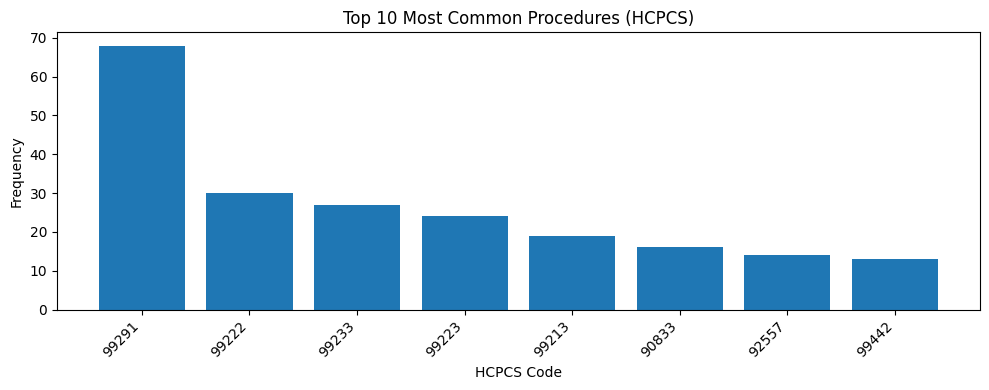

In [100]:
# -------------------------------
# Part 2.4: Common Procedures
# -------------------------------

## What are the 10 most frequently billed procedure codes (HCPCS)?
  ### Group by the HCPCS and ClientProcedureName and count how many times each appears
procedure_counts = df_line.groupby(
    ["HCPCS", "ClientProcedureName"]
).size().reset_index(name="Frequency")

  ### Sort the values
top10_procedures = procedure_counts.sort_values(
    "Frequency", ascending=False
).head(10)

print("Top 10 most frequently billed procedure codes (HCPCS):")
print(top10_procedures)

## Display: HCPCS code, description (if available in data), and frequency
## Create a bar chart showing the top 10 procedures
plt.figure(figsize=(10, 4))
plt.bar(top10_procedures["HCPCS"], top10_procedures["Frequency"])
plt.title("Top 10 Most Common Procedures (HCPCS)")
plt.xlabel("HCPCS Code")
plt.ylabel("Frequency")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

In [101]:
# ------------------------------------
# Part 2.5: Service Location Analysis
# ------------------------------------

## How many claims were submitted for each PlaceOfService?
pos_counts = df_header["PlaceOfService"].value_counts().reset_index()
pos_counts.columns = ["PlaceOfService", "ClaimCount"]

print("Number of claims by Place Of Service:")
print(pos_counts)

## What percentage of claims are for "INPATIENT" vs "DOCTOR'S OFFICE"?
  ### Percentage for each PlaceOfService
total_claims_header = pos_counts["ClaimCount"].sum()
pos_counts["Percent"] = (pos_counts["ClaimCount"] / total_claims_header * 100).round(2)

print("\nClaims by PlaceOfService with percentages:")
print(pos_counts)

  ### Count of claims for "INPATIENT" vs "DOCTOR'S OFFICE"
inpatient_claims = df_header[df_header["Facility_Location"] == "INPATIENT"].shape[0]
office_claims = df_header[df_header["Facility_Location"] == "DOCTOR'S OFFICE"].shape[0]

  ### Percentage of claims for "INPATIENT" vs "DOCTOR'S OFFICE"
inpatient_pct = (inpatient_claims / total_claims_header) * 100
office_pct = (office_claims / total_claims_header) * 100

print("\n INPATIENT claims:", inpatient_claims)
print("DOCTOR'S OFFICE claims:", office_claims)

if total_claims_header > 0:
    print("INPATIENT %:", round(inpatient_pct, 2))
    print("DOCTOR'S OFFICE %:", round(office_pct, 2))

Number of claims by Place Of Service:
   PlaceOfService  ClaimCount
0              21         231
1              11         132
2              22          24
3              23           1

Claims by PlaceOfService with percentages:
   PlaceOfService  ClaimCount  Percent
0              21         231    59.54
1              11         132    34.02
2              22          24     6.19
3              23           1     0.26

 INPATIENT claims: 231
DOCTOR'S OFFICE claims: 132
INPATIENT %: 59.54
DOCTOR'S OFFICE %: 34.02


In [102]:
# -------------------------------------
# Part 3: Advanced Analysis with Joins
# -------------------------------------

In [103]:
# -----------------------------------------------
# Part 3.6: Claims with High Service Line Counts
# -----------------------------------------------

## Merge the HEADER and LINE files
merge_file = df_header.merge(df_line, on='ProspectiveClaimId', how='inner')

## Calculate the total number of service lines per claim
service_line_sum = merge_file.groupby('ProspectiveClaimId').size().reset_index(name='Number of lines')
print(service_line_sum)

## Identify claims with 5 or more service lines
high_line = service_line_sum[service_line_sum['Number of lines'] >= 5]
print(f"\nNumber of claims with 5+ service lines: {len(high_line)}")

  ### Total charges per claim from line
claim_bill = merge_file.groupby('ProspectiveClaimId').agg({
    'Charges': 'sum',
    'BillingProvFirstName': 'first'
}).reset_index()

claim_bill.columns = ['ProspectiveClaimId', 'Total Charges', 'Provider name']

  ### # Merge with high_line
high_line = high_line.merge(claim_bill, on='ProspectiveClaimId', how='left')

## Display: ClaimId, Provider name, number of lines, and total charges
print("\nClaims with 5 or more service lines:")
print(high_line[['ProspectiveClaimId', 'Provider name', 'Number of lines', 'Total Charges']])

     ProspectiveClaimId  Number of lines
0              35216986                1
1              35235657                1
2              35244774                1
3              35249003                1
4              35249014                1
..                  ...              ...
383            36999799                3
384            37001070                4
385            37001295                3
386            37001309                3
387            37001489                2

[388 rows x 2 columns]

Number of claims with 5+ service lines: 5

Claims with 5 or more service lines:
   ProspectiveClaimId                        Provider name  Number of lines  \
0            36668119  UNIV.ASSOC.IN OBSTETRICS&GYNECOLOGY                6   
1            36710175  UNIV.ASSOC.IN OBSTETRICS&GYNECOLOGY                5   
2            36740402  UNIV.ASSOC.IN OBSTETRICS&GYNECOLOGY                6   
3            36757684  UNIV.ASSOC.IN OBSTETRICS&GYNECOLOGY                5   
4       

In [104]:
# -----------------------------------------------
# Part 3.7: Diagnosis-Procedure Combinations
# -----------------------------------------------

## Create a merged dataset linking claims to both procedures and diagnoses
merged_line = pd.merge(
    df_line,
    df_code,
    on=["ClientId", "ProspectiveClaimId"],
    how="inner"
)
## Find the most common diagnosis code (CodeValue) associated with CPT code 99291
cpt_99291 = merged_line[merged_line["HCPCS"] == "99291"]
# Count how often each diagnosis code (CodeValue) appears
dx_with_99291 = cpt_99291["CodeValue"].value_counts().reset_index()
dx_with_99291.columns = ["CodeValue", "Frequency"]

print("Diagnosis codes associated with CPT 99291 (most common first):")
print(dx_with_99291.head(10))
### Hint: You'll need to merge all three files together

Diagnosis codes associated with CPT 99291 (most common first):
  CodeValue  Frequency
0    J96.01         53
1     G93.5         34
2     E78.5         33
3     I61.9         26
4     D64.9         25
5       I10         24
6     I60.8         24
7     I95.9         20
8   D72.829         19
9   I67.848         17


In [105]:
# -----------------------------------------------
# Part 3.8: Charges by Payer
# -----------------------------------------------

## Merge HEADER and LINE files

## Calculate total charges (sum of all line charges) per claim
charges_per_claim = df_line.groupby(["ClientId", "ProspectiveClaimId"])["Charges"].sum().reset_index()

charges_per_claim = charges_per_claim.rename(columns={"Charges": "TotalClaimCharges"})

## Group by PrimaryPayerName and calculate:
header_with_charges = pd.merge(df_header, charges_per_claim, on=["ClientId", "ProspectiveClaimId"], how="inner")

## Total charges, Average charges per claim, Number of claims
payer_charge_stats = header_with_charges.groupby("PrimaryPayerName").agg(
    TotalCharges=("TotalClaimCharges", "sum"),
    AverageChargePerClaim=("TotalClaimCharges", "mean"),
    NumClaims=("ProspectiveClaimId", "nunique")
    ).reset_index()

  ### Rename columns
payer_stats = payer_charge_stats.rename(columns={
    "PrimaryPayerName": "Payer Name",
    "TotalCharges": "Total Charges",
    "NumberOfClaims": "Number of Claims",
    "AverageChargePerClaim": "Average Charges"
})

## Sort by total charges descending and display top 10 payers
payer_stats = payer_stats.sort_values("Total Charges", ascending=False)
top10_payers_by_charge = payer_stats.head(10)


cols_order = ["Payer Name", "Total Charges", "Number of Claims", "Average Charges"]

print("Top 10 payers by Total Charges:\n")
print(top10_payers_by_charge.to_string(index=False))

Top 10 payers by Total Charges:

                        Payer Name  Total Charges  Average Charges  NumClaims
                          MEDICARE         131008       541.355372        242
                   HEALTHFIRST FFS          29794       647.695652         46
        FIDELIS/BETTER HEALTH PLAN          10810       415.769231         26
                      HIP MEDICAID          10014       589.058824         17
                             AETNA           6930      1155.000000          6
                   DIRECT SELF PAY           6575      1095.833333          6
UNITED COMMUNITY PLAN GOVT PROGRAM           5175      1035.000000          5
             HEALTHFIRST CAPITATED           4905       490.500000         10
                    EMPIRE BLUE SR           4620      1155.000000          4
                         MAGNACARE           3465      1155.000000          3


In [109]:
# -------------------------------------
# Part 4: Creative Analysis
# -------------------------------------

Average claim charges by Place Of Service:
   PlaceOfService  AverageChargePerClaim
0              11             423.901515
1              21             678.593074
2              22             989.625000
3              23             410.000000


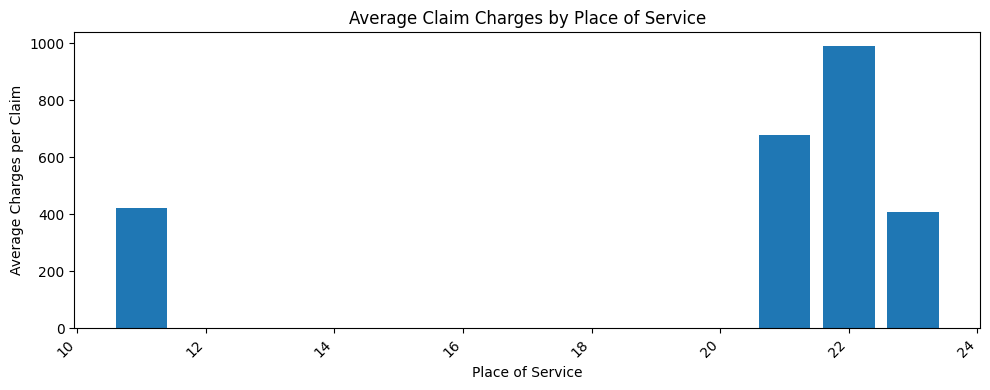

In [111]:
# -------------------------------------
# Part 4.9: Own Analysis
# -------------------------------------

# Q: What is the relationship between place of service and average total charges per claim?

## Total charges per claim
charges_per_claim = df_line.groupby(["ClientId", "ProspectiveClaimId"])["Charges"].sum().reset_index()
charges_per_claim = charges_per_claim.rename(columns={"Charges": "TotalClaimCharges"})

## Merge HEADER with charges_per_claim
header_with_charges_pos = pd.merge(df_header, charges_per_claim, on=["ClientId", "ProspectiveClaimId"], how="inner")

## Group by PlaceOfService and Compute average charges per claim
pos_charge_stats = header_with_charges_pos.groupby("PlaceOfService")["TotalClaimCharges"].mean().reset_index()
pos_charge_stats = pos_charge_stats.rename(columns={"TotalClaimCharges": "AverageChargePerClaim"})

print("Average claim charges by Place Of Service:")
print(pos_charge_stats)

## Bar chart of average charges by place of service
plt.figure(figsize=(10, 4))
plt.bar(pos_charge_stats["PlaceOfService"],
        pos_charge_stats["AverageChargePerClaim"])
plt.title("Average Claim Charges by Place of Service")
plt.xlabel("Place of Service")
plt.ylabel("Average Charges per Claim")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()